In [56]:
#importing all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [57]:
#getting the data 
dataset = pd.read_csv(r"C:\Users\Akhilesh Kumar\Downloads\gld_price_data.csv")
dataset.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [58]:
#checking for null values
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [59]:
#checking the columns Data Types 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [60]:
#Extracting the Month and Year from the Date Column so that we can use in prediction
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year

In [61]:
#Checking top 3 data of dataset
dataset.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008


In [62]:
dataset.tail(3)

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753,2018
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118,2018
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033,2018


In [63]:
#checking the mathematical values
dataset.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271


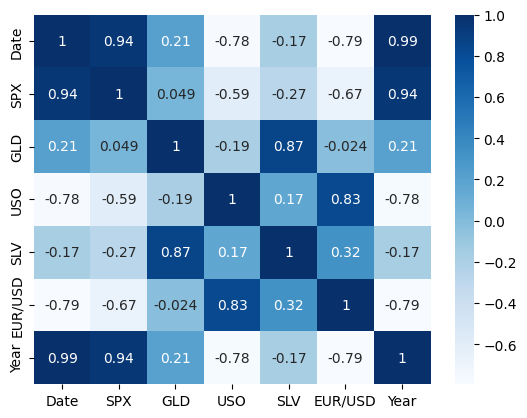

In [64]:
#checking the correlation of Input and Output data
sns.heatmap(data = dataset.corr(), annot = True, cmap = 'Blues')
plt.show()

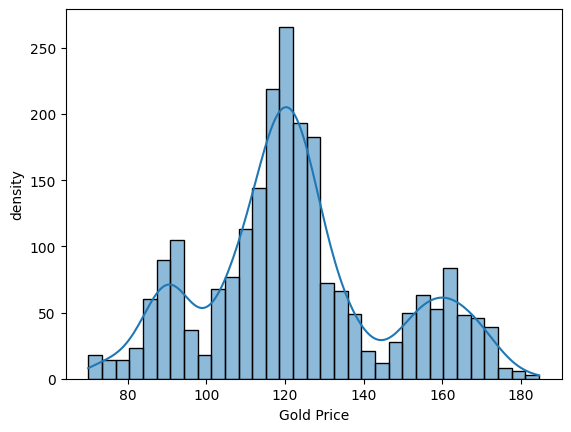

In [65]:
#checking the density of Output Column
sns.histplot(dataset['GLD'],kde = True)
plt.xlabel("Gold Price")
plt.ylabel("density")
plt.show()

In [66]:
#Spliting data into Input and Output
x = dataset.drop(columns = ['Date','GLD'])
y = dataset['GLD']

In [67]:
#Checking the accuracy scores before training the model
cross_val_score(RandomForestRegressor(),x,y,cv = KFold(n_splits = 5))

array([-2.62780344,  0.58090379,  0.93650121,  0.39242354, -0.13077285])

In [68]:
#spliting the model into trianing and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [69]:
#Training the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
#r2_score is used to check the how model is performing
y_prd = model.predict(x)
r2_score(y,y_prd)

0.997250194394562

In [71]:
# Checking the model accuracy score by training and testing data. By this we can say that data is not overfitted
model.score(x_test,y_test), model.score(x_train, y_train)

(0.9910069611158295, 0.9987593108215316)

In [72]:
dataset.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271


In [73]:
#Predicting the Gold Share price
spx = float(input("Enter the price for S&P Index: "))
uso = float(input("Enter the price of United States Oil Fund: "))
slv = float(input("Enter the price of the iShares Silver Trust: "))
eur_usd = float(input("Enter the Euro to U.S. Dollar exchange rate: "))
year = int(input("Enter year: "))
print(f"Predicted one Share of Gold Value : {model.predict([[spx, uso, slv, eur_usd,year]])}")

Enter the price for S&P Index:  6445.6
Enter the price of United States Oil Fund:  72.61
Enter the price of the iShares Silver Trust:  34.57
Enter the Euro to U.S. Dollar exchange rate:  1.167245
Enter year:  2025


Predicted one Share of Gold Value : [166.89839977]


C:\Users\Akhilesh Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
